In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [83]:
df=pd.read_excel("trend_sample_data.xlsx")
df.head()
df

,eligible_rtp_date,churned
0,2021-01-11,1
1,2021-01-11,0
2,2021-01-11,0
3,2021-01-11,0
4,2021-01-12,1
...,...,...
4994,2021-01-11,0
4995,2021-01-11,0
4996,2021-01-11,0
4997,2021-01-11,0


In [90]:
def trend_plot(dataframe,n):
    import statsmodels.api as sm #importing statsmodels for decomposition
    dataframe["churned"]=dataframe["churned"].astype("O") # change the churn rate to the object format
    dataframe=pd.get_dummies(dataframe) # get seperate columns for 0 and 1 that is non churned and churned
    dataframe.index=pd.to_datetime(dataframe["eligible_rtp_date"],format="%Y--%m--%d")  #convert the date to index
    df1=dataframe.groupby(pd.Grouper(freq=n)).sum()#get the count of churned and non_churned
    df1=df1.reset_index() #reset the index because its overlap for next execution
    
    df2=(dataframe.groupby(pd.Grouper(freq=n)).sum()/dataframe.shape[0])*100
    
    
    
    
    df2=df2.reset_index()#reset_index for the next execution
    dataframe=pd.merge(df1,df2,on=["eligible_rtp_date"]) #merge the count and percentage of the churned
    dataframe.rename({"churned_0_x":"non_churned","churned_1_x":"churned","churned_0_y":"non_churned_percentage","churned_1_y":"churned_percentage"},axis=1,inplace=True)#change the names of the columns
    dataframe=dataframe.set_index("eligible_rtp_date") #make the datetime_index
    dataframe["Total"]=dataframe["non_churned"]+dataframe["churned"] # get total no of observation for that date
    #dataframe["Total_percentage"]=dataframe["non_churned_percentage"]+dataframe["churned_percentage"]
    decomposition1 = sm.tsa.seasonal_decompose(dataframe["churned_percentage"],model="additive",period=1)#decompose the data for churn percentage
    decomposition2 = sm.tsa.seasonal_decompose(dataframe["non_churned_percentage"],model="additive",period=1)#decompose the data for the non-churn percentage
    trend1=decomposition1.trend.plot(xlabel= "Date",ylim=[0,100],label="Churned_Percentage_trend")#plot the graph for trend
    trend2=decomposition2.trend.plot(ylim=[0,100],label="Non_Churned_Percentage_trend")#plot the graph for the trend
    plt.title("Percentage Churned")
    plt.legend()

    return dataframe.head()
    return trend1,trend2
    

100.0


,non_churned,churned,non_churned_percentage,churned_percentage,Total,Total_percentage
eligible_rtp_date,,,,,,
2021-01-11,4914.0,65.0,98.299660,1.300260,4979.0,99.599920
2021-01-13,9.0,8.0,0.180036,0.160032,17.0,0.340068
2021-01-15,3.0,0.0,0.060012,0.000000,3.0,0.060012


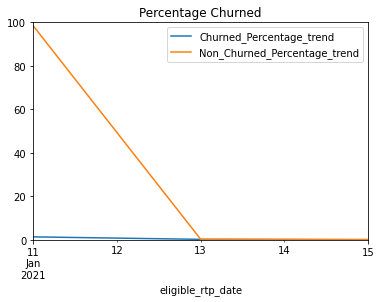

In [100]:
df1=trend_plot(df,"2D")

print(df1["Total_percentage"].sum())
df1

In [143]:
def trend_plot(dataframe,n):
    import statsmodels.api as sm #importing statsmodels for decomposition
    dataframe["churned"]=dataframe["churned"].astype("O") # change the churn rate to the object format
    dataframe=pd.get_dummies(dataframe) # get seperate columns for 0 and 1 that is non churned and churned
    dataframe.index=pd.to_datetime(dataframe["eligible_rtp_date"],format="%Y--%m--%d")  #convert the date to index
    dataframe1=dataframe.groupby(pd.Grouper(freq=n)).sum()#get the count of churned and non_churned
    dataframe1=dataframe1.reset_index() #reset the index because its overlap for next execution
    dataframe1=dataframe1.set_index("eligible_rtp_date") #make the datetime_index
    dataframe1.rename({"churned_0":"non_churned","churned_1":"churned"},axis=1,inplace=True)#change the names of the columns
    dataframe1["total"]=dataframe1["non_churned"]+dataframe1["churned"]
    dataframe1["non_churned_percentage"]=(dataframe1["non_churned"]/dataframe1["total"])*100
    dataframe1["churned_percentage"]=(dataframe1["churned"]/dataframe1["total"])*100
    
    decomposition1 = sm.tsa.seasonal_decompose(dataframe1["churned_percentage"],model="additive",period=1)#decompose the data for churn percentage
    decomposition2 = sm.tsa.seasonal_decompose(dataframe1["non_churned_percentage"],model="additive",period=1)#decompose the data for the non-churn percentage
    trend1=decomposition1.trend.plot(xlabel= "Date",ylim=[0,100],label="Churned_Percentage_trend")#plot the graph for trend
    trend2=decomposition2.trend.plot(ylim=[0,100],label="Non_Churned_Percentage_trend")#plot the graph for the trend
    plt.title("Percentage Churned")
    plt.legend()
    
    return dataframe1.head()
    

,non_churned,churned,total,non_churned_percentage,churned_percentage
eligible_rtp_date,,,,,
2021-01-11,4907.0,61.0,4968.0,98.772142,1.227858
2021-01-12,7.0,4.0,11.0,63.636364,36.363636
2021-01-13,7.0,8.0,15.0,46.666667,53.333333
2021-01-14,2.0,0.0,2.0,100.000000,0.000000
2021-01-15,3.0,0.0,3.0,100.000000,0.000000


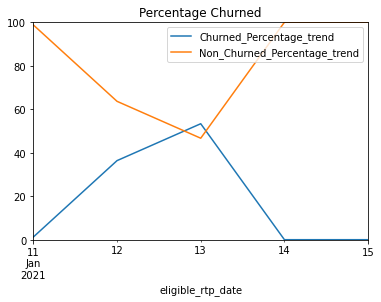

In [151]:
trend_plot(df,"1D")